In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

# Question 1;

In [396]:
bachelors_degrees_women_df = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

bachelors_degrees_women_df 

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,NaN,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,NaN
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,NaN,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


In [397]:
# Q1(a) pt. 1


print('Total Number of Missing Values;')

bachelors_degrees_women_df.isnull().sum().sum()

Total Number of Missing Values;


20

In [398]:
# Q1(a) pt. 2;

missing_values = bachelors_degrees_women_df.isnull().sum()

missing = missing_values.nlargest(3)

missing

Biology             6
Engineering         5
Computer Science    4
dtype: int64

In [399]:
# Q1(b);

bachelors_degrees_women_df[bachelors_degrees_women_df['Biology'].isnull()]['Year']

28    1998
29    1999
30    2000
31    2001
32    2002
33    2003
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='Biology'>

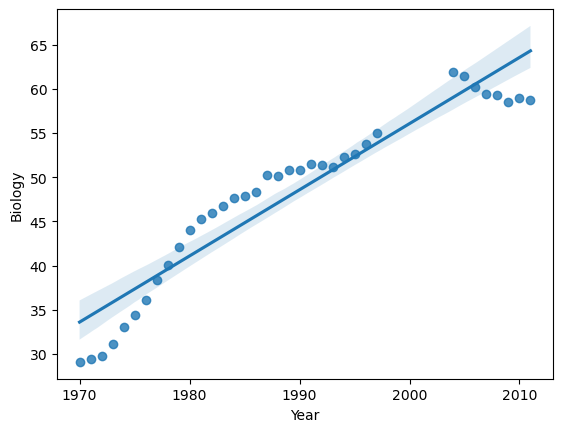

In [400]:
# Q1(c);

sns.regplot(
    x = 'Year',
    y = 'Biology',
    data = bachelors_degrees_women_df
)

In [401]:
# Q1(d);

bachelors_degrees_women_df.fillna(bachelors_degrees_women_df.mean(), inplace = True)

bachelors_degrees_women_df

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.600000,74.535328,0.8,65.570923,73.800000,77.1,38.0,13.800000,44.400000,68.40000,36.800000
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.600000,74.149204,1.0,64.556485,73.900000,75.5,39.0,14.900000,46.200000,65.50000,36.200000
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.900000,73.554520,1.2,63.664263,74.600000,76.9,40.2,14.800000,47.600000,62.60000,36.100000
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.400000,73.501814,1.6,62.941502,74.900000,77.4,40.9,16.500000,50.400000,64.30000,36.400000
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.900000,73.336811,2.2,62.413412,75.300000,77.9,41.8,18.200000,52.600000,66.10000,37.300000
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.800000,72.801854,3.2,61.647206,75.000000,78.9,40.7,19.100000,54.500000,63.00000,37.700000
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,25.689474,72.166525,4.5,62.148194,74.400000,79.2,41.5,20.000000,56.900000,65.60000,39.200000
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.700000,72.456395,6.8,62.723067,74.300000,80.5,41.1,21.300000,59.000000,69.30000,45.526829
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.100000,73.192821,8.4,63.619122,74.300000,81.9,41.6,22.500000,61.300000,71.50000,41.800000
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.200000,73.821142,12.7,65.088390,74.200000,82.3,42.3,23.700000,63.300000,73.30000,43.600000


In [402]:
# Q1(e);

bachelors_degrees_women_df.columns = bachelors_degrees_women_df.columns.str.replace(' ', '_').str.title()

bachelors_degrees_women_df

,Year,Agriculture,Architecture,Art_And_Performance,Biology,Business,Communications_And_Journalism,Computer_Science,Education,Engineering,English,Foreign_Languages,Health_Professions,Math_And_Statistics,Physical_Sciences,Psychology,Public_Administration,Social_Sciences_And_History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.600000,74.535328,0.8,65.570923,73.800000,77.1,38.0,13.800000,44.400000,68.40000,36.800000
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.600000,74.149204,1.0,64.556485,73.900000,75.5,39.0,14.900000,46.200000,65.50000,36.200000
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.900000,73.554520,1.2,63.664263,74.600000,76.9,40.2,14.800000,47.600000,62.60000,36.100000
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.400000,73.501814,1.6,62.941502,74.900000,77.4,40.9,16.500000,50.400000,64.30000,36.400000
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.900000,73.336811,2.2,62.413412,75.300000,77.9,41.8,18.200000,52.600000,66.10000,37.300000
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.800000,72.801854,3.2,61.647206,75.000000,78.9,40.7,19.100000,54.500000,63.00000,37.700000
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,25.689474,72.166525,4.5,62.148194,74.400000,79.2,41.5,20.000000,56.900000,65.60000,39.200000
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.700000,72.456395,6.8,62.723067,74.300000,80.5,41.1,21.300000,59.000000,69.30000,45.526829
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.100000,73.192821,8.4,63.619122,74.300000,81.9,41.6,22.500000,61.300000,71.50000,41.800000
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.200000,73.821142,12.7,65.088390,74.200000,82.3,42.3,23.700000,63.300000,73.30000,43.600000


In [403]:
# Q1(f);

df = bachelors_degrees_women_df[(bachelors_degrees_women_df['Year'] >= 2000) 
& (bachelors_degrees_women_df['Year'] <= 2009)]

df.set_index('Year', inplace=True)

major_mean = df.mean(axis = 0)

sorted_mean = major_mean.sort_values(ascending = False)

top_majors = sorted_mean.head(5)

print("Top 5 Majors;")

top_majors

Top 5 Majors;


Health_Professions       85.500000
Public_Administration    80.794878
Education                78.511139
Psychology               76.566341
Foreign_Languages        70.320000
dtype: float64

# Question 2;

In [404]:
# Q2(a);

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

response = requests.get(url, verify=True)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable'})

GDP_by_Country = pd.read_html(str(table))[0]

GDP_by_Country

Country/Territory UN Region IMF[4][5]       World Bank[6]        \
    Country/Territory UN Region  Estimate  Year      Estimate  Year   
0              Monaco    Europe         —     —        240862  2022   
1       Liechtenstein    Europe         —     —        197505  2021   
2          Luxembourg    Europe    131384  2024        125006  2022   
3             Bermuda  Americas         —     —        118775  2022   
4             Ireland    Europe    106059  2024        103983  2022   
..                ...       ...       ...   ...           ...   ...   
218            Malawi    Africa       481  2024           645  2022   
219       South Sudan    Africa       422  2024          1072  2015   
220       Afghanistan      Asia       422  2022           356  2021   
221             Syria      Asia         —     —           421  2021   
222           Burundi    Africa       230  2024           259  2022   

    United Nations[7]        
             Estimate  Year  
0              234317  2021  
1              169260  2021  
2              133745  2021  
3              112653  2021  
4              101109  2021  
..                ...   ...  
218               613  2021  
219               400  2021  
220               373  2021  
221               925  2021  
222               311  2021  

[223 rows x 8 columns]

In [405]:
# Q2(aI);

GDP_by_Country = GDP_by_Country.dropna(how = 'all')

GDP_by_Country = GDP_by_Country.iloc[:, [0, 2]]  

GDP_by_Country

,Country/Territory,IMF[4][5]
,Country/Territory,Estimate
0,Monaco,—
1,Liechtenstein,—
2,Luxembourg,131384
3,Bermuda,—
4,Ireland,106059
...,...,...
218,Malawi,481
219,South Sudan,422
220,Afghanistan,422


In [406]:
# Q2(aII);

GDP_by_Country.columns = ['Country', 'GDP']

GDP_by_Country

,Country,GDP
0,Monaco,—
1,Liechtenstein,—
2,Luxembourg,131384
3,Bermuda,—
4,Ireland,106059
...,...,...
218,Malawi,481
219,South Sudan,422
220,Afghanistan,422
221,Syria,—


In [407]:
# Q2 (aIII);

cleaned_country_name = lambda x: ''.join(filter(str.isalpha, x))

GDP_by_Country.loc[:, 'Country'] = GDP_by_Country['Country'].apply(cleaned_country_name)

GDP_by_Country

,Country,GDP
0,Monaco,—
1,Liechtenstein,—
2,Luxembourg,131384
3,Bermuda,—
4,Ireland,106059
...,...,...
218,Malawi,481
219,SouthSudan,422
220,Afghanistan,422
221,Syria,—


In [408]:
# Q2(b)

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

response = requests.get(url, verify=True)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable'})

Population_by_Country = pd.read_html(str(table))[0]

Population_by_Country

,Location,Population (1 July 2022),Population (1 July 2023),Change,UN Continental Region[1],UN Statistical Subregion[1]
0,World,7975105156,8045311448,+0.88%,NaN,NaN
1,India,1417173173,1428627663,+0.81%,Asia,Southern Asia
2,China[a],1425887337,1425671352,−0.02%,Asia,Eastern Asia
3,United States,338289857,339996564,+0.50%,Americas,Northern America
4,Indonesia,275501339,277534123,+0.74%,Asia,South-eastern Asia
...,...,...,...,...,...,...
234,Falkland Islands (United Kingdom),3780,3791,+0.29%,Americas,South America
235,Niue,1934,1935,+0.05%,Oceania,Polynesia
236,Tokelau (New Zealand),1871,1893,+1.18%,Oceania,Polynesia
237,Vatican City[x],510,518,NaN,Europe,Southern Europe


In [409]:
# Q2(b, pt a & b);

Population_by_Country = Population_by_Country[['Location', 'Population (1 July 2023)']]

Population_by_Country.columns = ['Country', 'Population']

Population_by_Country

,Country,Population
0,World,8045311448
1,India,1428627663
2,China[a],1425671352
3,United States,339996564
4,Indonesia,277534123
...,...,...
234,Falkland Islands (United Kingdom),3791
235,Niue,1935
236,Tokelau (New Zealand),1893
237,Vatican City[x],518


In [410]:
# Q2 (b pt. c);

merged_df = pd.merge(GDP_by_Country, Population_by_Country, on='Country', how='left')

merged_df

,Country,GDP,Population
0,Monaco,—,36298.0
1,Liechtenstein,—,39585.0
2,Luxembourg,131384,654768.0
3,Bermuda,—,NaN
4,Ireland,106059,5056935.0
...,...,...,...
218,Malawi,481,20931751.0
219,SouthSudan,422,NaN
220,Afghanistan,422,42239854.0
221,Syria,—,23227014.0


In [411]:
# Q2(b pt. d);

not_available = merged_df['Population'].isna().sum()


print('Total Amount of Population that is NOT Available;')
not_available

Total Amount of Population that is NOT Available;


79

# Question 3;

In [412]:
fish_df = pd.read_csv('Canadian_Fish_Biodiversity.csv')

fish_df

,SITEID,Species,Number Captured,Minimum (mm),Maximum (mm),Project Name,Day,Month,Year,Waterbody Name,WaterbodyType,Start Latitude,Start Longitude,Air Temperature (C),Water Temperature (C),Turbidity (ntu)
0,5599,Notropis hudsonius,3.0,79.0,81.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
1,5599,Proterorhinus semilunaris,1.0,65.0,65.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
2,5599,Notropis hudsonius,1.0,75.0,85.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
3,5599,Percopsis omiscomaycus,3.0,94.0,105.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
4,5599,Notropis hudsonius,2.0,71.0,102.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,12250,Ictalurus punctatus,1.0,58.0,58.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN
8383,12250,Percina maculata,1.0,58.0,58.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN
8384,12250,Cyprinella spiloptera,2.0,45.0,69.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN
8385,12250,Etheostoma blennioides,1.0,50.0,50.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN


In [413]:
# Q3(a);

top_projects = fish_df.groupby('Project Name')['SITEID'].nunique()

top_projects = top_projects.nlargest(3)

top_projects

Project Name
2013 GLAP Survey of Detroit River           220
2013 Crown Marsh Survey                     146
2013 Spotted Gar Critical Habitat Survey    131
Name: SITEID, dtype: int64

In [414]:
# Q3(b);

sum_fishing_events = fish_df.groupby('Project Name')['SITEID'].count()

unique_sites = fish_df.groupby('Project Name')['SITEID'].nunique()

quanity = (unique_sites / sum_fishing_events) 

quanity.nlargest(3)

quanity.nsmallest(3)

Project Name
2013 Grass Pickerel Twenty Mile Creek           0.047619
2013 Mussel Fish Community Assessment           0.056452
2013 Lake Chubsucker Critical Habitat Survey    0.056572
Name: SITEID, dtype: float64

In [415]:
# Q3(c)

august = fish_df.loc[fish_df['Month'] == 8]

august.groupby('Project Name')[['Air Temperature (C)', 'Water Temperature (C)']].agg(['min', 'mean', 'std', 'max'])

Air Temperature (C)             \
                                                             min       mean   
Project Name                                                                  
2013 Bridle Shiner Critical Habitat Survey                  20.7  24.609091   
2013 Crown Marsh Survey                                     16.4  21.667872   
2013 GLAP Survey of Detroit River                           21.1  24.406220   
2013 Grass Pickerel Niagara Drains                          20.8  25.246154   
2013 Grass Pickerel Twenty Mile Creek                       22.5  25.340107   
2013 Lake Chubsucker Critical Habitat Survey                14.3  20.814612   
2013 Mussel Fish Community Assessment                       23.0  24.535887   
2013 Pugnose Minnow Lake St Clair Drains                    22.2  25.303061   
2013 Species at Risk Assessment                             23.3  24.456000   
2013 Spotted Gar Critical Habitat Survey                    18.6  22.706481   

                                                              \
                                                   std   max   
Project Name                                                   
2013 Bridle Shiner Critical Habitat Survey    2.588098  26.5   
2013 Crown Marsh Survey                       2.057387  26.2   
2013 GLAP Survey of Detroit River             2.652812  28.3   
2013 Grass Pickerel Niagara Drains            2.498615  28.2   
2013 Grass Pickerel Twenty Mile Creek         2.395997  29.4   
2013 Lake Chubsucker Critical Habitat Survey  3.968119  32.6   
2013 Mussel Fish Community Assessment         1.203286  26.1   
2013 Pugnose Minnow Lake St Clair Drains      1.961982  29.0   
2013 Species at Risk Assessment               0.809362  25.0   
2013 Spotted Gar Critical Habitat Survey      2.590503  27.7   

                                             Water Temperature (C)             \
                                                               min       mean   
Project Name                                                                    
2013 Bridle Shiner Critical Habitat Survey                  20.630  22.052182   
2013 Crown Marsh Survey                                     17.430  22.007084   
2013 GLAP Survey of Detroit River                           21.646  22.028226   
2013 Grass Pickerel Niagara Drains                          17.150  20.105641   
2013 Grass Pickerel Twenty Mile Creek                       18.990  22.380238   
2013 Lake Chubsucker Critical Habitat Survey                19.300  21.671746   
2013 Mussel Fish Community Assessment                       21.800  23.155645   
2013 Pugnose Minnow Lake St Clair Drains                    18.970  20.713163   
2013 Species at Risk Assessment                             21.960  22.075600   
2013 Spotted Gar Critical Habitat Survey                    18.639  21.349769   

                                                               
                                                   std    max  
Project Name                                                   
2013 Bridle Shiner Critical Habitat Survey    0.503887  22.44  
2013 Crown Marsh Survey                       1.240151  23.24  
2013 GLAP Survey of Detroit River             0.392402  23.11  
2013 Grass Pickerel Niagara Drains            2.426792  23.96  
2013 Grass Pickerel Twenty Mile Creek         2.533686  26.87  
2013 Lake Chubsucker Critical Habitat Survey  1.619878  25.13  
2013 Mussel Fish Community Assessment         1.156345  24.60  
2013 Pugnose Minnow Lake St Clair Drains      1.676571  24.22  
2013 Species at Risk Assessment               0.080936  22.13  
2013 Spotted Gar Critical Habitat Survey      1.978877  24.30

In [416]:
# Q3(d);

min_latitude = fish_df['Start Latitude'].min()
max_latitude = fish_df['Start Latitude'].max()

bins = [min_latitude, 42.4, 42.8, max_latitude]
labels = ['Southern', 'Central', 'Northern']

fish_df['Region'] = pd.cut(fish_df['Start Latitude'], bins = bins, labels = labels)

fish_df

,SITEID,Species,Number Captured,Minimum (mm),Maximum (mm),Project Name,Day,Month,Year,Waterbody Name,WaterbodyType,Start Latitude,Start Longitude,Air Temperature (C),Water Temperature (C),Turbidity (ntu),Region
0,5599,Notropis hudsonius,3.0,79.0,81.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3,Central
1,5599,Proterorhinus semilunaris,1.0,65.0,65.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3,Central
2,5599,Notropis hudsonius,1.0,75.0,85.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3,Central
3,5599,Percopsis omiscomaycus,3.0,94.0,105.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3,Central
4,5599,Notropis hudsonius,2.0,71.0,102.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,12250,Ictalurus punctatus,1.0,58.0,58.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN,Central
8383,12250,Percina maculata,1.0,58.0,58.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN,Central
8384,12250,Cyprinella spiloptera,2.0,45.0,69.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN,Central
8385,12250,Etheostoma blennioides,1.0,50.0,50.0,2013 Mussel Fish Community Assessment,28,8,2013,Sydenham River,Stream,42.62693,-82.02296,25.0,24.60,NaN,Central


<Axes: xlabel='Month', ylabel='Air Temperature (C)'>

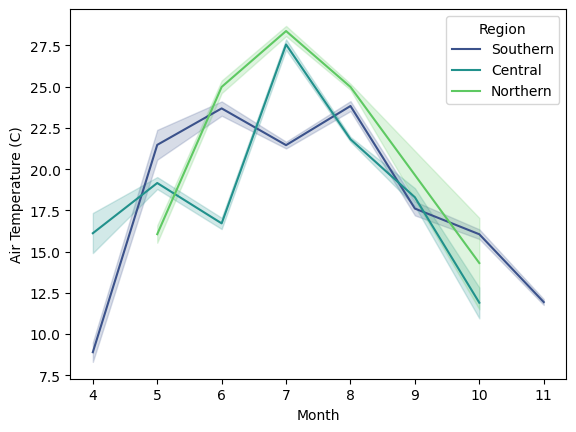

In [417]:
# Q3(e);

sns.lineplot(
    data = fish_df,
    x = 'Month',
    y = 'Air Temperature (C)',
    hue = 'Region',
    palette='viridis'
)

In [418]:
# Q3(f);

sum_total_captured = fish_df.groupby(['Region', 'Species']).agg({'Number Captured': 'sum'})

top_by_region = (
    sum_total_captured
    .sort_values(['Region', 'Number Captured'], ascending = [True, False]) 
    .groupby('Region')  
    .head(3)  
)

top_by_region

Number Captured
Region   Species                                
Southern Lepomis macrochirus              5072.0
         Dorosoma cepedianum              3559.0
         Neogobius melanostomus           2265.0
Central  Lepomis macrochirus              2126.0
         Labidesthes sicculus             2029.0
         Notropis heterodon               1562.0
Northern Neogobius melanostomus           2522.0
         Notropis volucellus              2104.0
         Lepomis macrochirus              1841.0

In [419]:
# Q3(g)

region_max_min = fish_df.groupby('Region', as_index = False).agg({
    'Maximum (mm)': 'max',
    'Minimum (mm)': 'min'
})

region_max_min['Length Range'] = region_max_min['Maximum (mm)'] - region_max_min['Minimum (mm)']

largest_range_region = region_max_min[region_max_min['Length Range'] == region_max_min['Length Range'].max()]

print(region_max_min)

print(largest_range_region)

     Region  Maximum (mm)  Minimum (mm)  Length Range
0  Southern        1130.0           8.0        1122.0
1   Central         785.0           9.0         776.0
2  Northern         760.0          10.0         750.0
     Region  Maximum (mm)  Minimum (mm)  Length Range
0  Southern        1130.0           8.0        1122.0


# Question 4

In [420]:
real_GDP = pd.read_csv('Real_GDP.csv')

real_GDP

,Description,GeoName,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Real GDP (millions of chained 2012 dollars),Alabama,144501.2,149568.2,154900.2,157221.3,156853.2,160422.4,165134.7,176625.0,...,187605.8,189245.5,191369.8,189886.3,191335.2,194283.8,197566.6,200800.9,203383.9,196906.1
1,Real GDP (millions of chained 2012 dollars),Alaska,42211.3,41095.9,40590.5,39406.6,40958.7,42979.0,42355.3,44055.0,...,55280.3,58283.6,55354.3,54188.2,54740.8,54246.6,54129.5,53249.6,53336.5,50161.0
2,Real GDP (millions of chained 2012 dollars),Arizona,168408.8,183060.5,198699.9,208439.5,213166.2,220696.7,234065.9,244317.3,...,266101.5,271440.0,273481.9,276948.9,282577.0,291275.2,302455.4,313618.7,323894.3,320550.6
3,Real GDP (millions of chained 2012 dollars),Arkansas,82571.3,84570.8,89115.2,89871.7,89789.0,92950.5,96944.5,101733.6,...,107932.5,108492.1,110752.4,111734.5,112351.0,112798.1,113885.2,115937.6,116790.9,114943.5
4,Real GDP (millions of chained 2012 dollars),California,1378276.5,1468730.8,1574305.9,1696172.4,1692324.1,1722522.4,1789998.5,1850904.5,...,2063827.5,2113096.4,2179229.0,2256054.7,2357452.9,2427894.6,2541769.3,2643576.3,2739343.4,2663665.9
5,Real GDP (millions of chained 2012 dollars),Colorado,184185.3,200679.7,215294.6,231589.8,234979.4,235417.3,237782.3,240747.6,...,271700.6,276823.1,286259.1,298655.3,312409.7,318953.4,329960.6,342535.9,356773.6,346011.3
6,Real GDP (millions of chained 2012 dollars),Connecticut,190518.9,196391.1,202351.7,216157.6,218135.3,216677.7,219186.0,233426.5,...,238542.4,240911.9,236050.6,235780.9,242706.5,243286.7,247358.5,249998.1,251495.1,235888.6
7,Real GDP (millions of chained 2012 dollars),Delaware,45980.1,50434.3,54236.7,56550.2,58372.7,56534.5,57300.0,60069.9,...,62919.3,62354.6,60235.8,64940.1,66793.5,63001.3,60801.2,61735.1,64262.4,62056.2
8,Real GDP (millions of chained 2012 dollars),District of Columbia,79827.7,81214.4,84756.2,85355.9,88440.7,91141.5,92921.0,97463.5,...,111646.5,112157.0,112332.4,114553.6,116808.4,119644.3,120898.9,123836.1,124990.3,122342.1
9,Real GDP (millions of chained 2012 dollars),Florida,559805.3,587970.7,615238.2,642708.2,660659.5,689974.0,722374.5,769140.5,...,772021.3,778545.0,794842.1,817233.5,852242.4,881539.2,912966.2,943463.4,971619.2,944000.8


In [421]:
surplus = pd.read_csv('Surplus.csv')

surplus

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1997,37247.9,11061.3,53776.0,23316.0,431069.4,52989.4,50568.5,16293.5,14801.0,...,8080.7,56801.1,244940.9,21611.1,5209.7,76237.6,72446.4,13885.1,50462.3,6273.1
1,1998,39368.1,9388.7,57020.8,23736.9,453030.9,57765.1,51906.8,18697.3,15341.7,...,8684.2,63996.5,245730.4,23178.6,5199.0,81875.3,76716.3,14251.7,53446.9,5978.0
2,1999,41513.7,9690.1,62895.4,25718.4,487837.8,62638.8,53755.3,20725.1,16243.4,...,8995.0,66809.7,253513.2,24521.9,5605.6,89269.7,85342.4,14934.6,56541.8,6312.0
3,2000,42583.4,10455.7,62781.3,25974.1,509912.0,66475.0,59834.2,22478.8,16094.7,...,9851.0,66815.6,274635.9,25717.0,5948.6,93412.4,84431.5,14530.0,58484.6,7028.3
4,2001,43348.6,11337.1,64896.1,26235.7,514711.6,68887.7,62264.6,24465.3,17549.1,...,10123.1,68719.4,290137.2,26481.1,6220.2,101719.0,83915.8,14893.5,61242.4,7918.0
5,2002,45807.1,11963.7,70104.3,27860.2,537381.3,72171.8,64528.0,23211.3,19130.0,...,12112.7,74042.1,299342.5,28312.8,6704.1,106519.4,89565.8,15912.1,63661.6,7809.8
6,2003,49100.6,13311.2,77869.7,30737.5,581749.9,76283.5,66380.9,24421.2,19891.3,...,12535.6,77725.3,328901.9,29891.6,7029.1,111319.2,93420.9,16457.3,67530.7,9065.6
7,2004,57547.0,15436.6,81311.9,33626.0,609807.5,78021.1,76332.1,26159.7,21945.4,...,13614.7,83882.3,382306.7,33214.2,7812.4,116555.6,97280.7,17634.8,72219.0,10345.9
8,2005,63137.0,19019.1,90811.9,36232.1,669808.7,87175.9,81040.6,25434.9,23285.3,...,14875.2,90191.7,427799.9,38546.0,7765.0,127336.6,111906.6,19833.9,79326.1,13222.2
9,2006,65253.3,22400.6,94686.5,38116.8,718212.0,90876.4,90802.1,26980.5,23956.6,...,15118.3,94943.3,484610.6,43888.0,7962.3,135207.8,119397.6,21407.6,83054.1,16010.9


In [422]:
compensation = pd.read_csv('Compensation.csv')

compensation

,Year,GeoName,Description,value
0,1997,Alabama,Chain-type quantity indexes for real GDP,76.356
1,1997,Alabama,Compensation (millions of dollars),61083.800
2,1997,Alaska,Chain-type quantity indexes for real GDP,72.424
3,1997,Alaska,Compensation (millions of dollars),12347.800
4,1997,Arizona,Chain-type quantity indexes for real GDP,62.043
...,...,...,...,...
2443,2020,West Virginia,Compensation (millions of dollars),40948.000
2444,2020,Wisconsin,Chain-type quantity indexes for real GDP,105.272
2445,2020,Wisconsin,Compensation (millions of dollars),197578.000
2446,2020,Wyoming,Chain-type quantity indexes for real GDP,93.312


In [423]:
# Q4(a)

dp_melt = pd.melt(real_GDP, id_vars = ["GeoName"], var_name = "Year", value_name = "GDP")

gdp_melt = dp_melt[dp_melt["Year"].str.isdigit()]
gdp_melt["Year"] = gdp_melt["Year"].astype(int)
gdp_melt.rename(columns={'GeoName': 'State'}, inplace=True)

surplus_melt = pd.melt(surplus, id_vars = ['Year'], var_name = 'State', value_name = 'Surplus')

surplus_melt = surplus_melt[surplus_melt['Year'].astype(str).str.isdigit()]
surplus_melt['Year'] = surplus_melt['Year'].astype(int)

compensation_melt = compensation.pivot_table(
    index = ['GeoName', 'Year'],
    columns = 'Description',
    values = 'value'
).reset_index()

compensation_melt.columns.name = None

compensation_melt.rename(
    columns = {
        'Chain-type quantity indexes for real GDP': 'ChainTypeIndex',
        'Compensation (millions of dollars)': 'Compensation'
    },
    inplace = True
)

compensation_melt.rename(columns = {'GeoName': 'State'}, inplace = True)

melted_df = gdp_melt.merge(surplus_melt, on=["State", "Year"], how="inner").merge(compensation_melt, on=["State", "Year"], how="inner")

melted_df

C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\342728352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_melt["Year"] = gdp_melt["Year"].astype(int)
C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\342728352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_melt.rename(columns={'GeoName': 'State'}, inplace=True)


,State,Year,GDP,Surplus,ChainTypeIndex,Compensation
0,Alabama,1997,144501.2,37247.9,76.356,61083.8
1,Alaska,1997,42211.3,11061.3,72.424,12347.8
2,Arizona,1997,168408.8,53776.0,62.043,69876.9
3,Arkansas,1997,82571.3,23316.0,76.108,32715.5
4,California,1997,1378276.5,431069.4,65.225,574432.9
...,...,...,...,...,...,...
1219,Virginia,2020,473817.5,200788.1,106.243,327867.2
1220,Washington,2020,532861.9,248091.9,133.039,326111.4
1221,West Virginia,2020,69711.6,31157.2,99.132,40948.0
1222,Wisconsin,2020,291715.8,128759.4,105.272,197578.0


C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\344122589.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.lineplot(data = mean_values, x = 'Year', y = 'GDP', label = 'Mean GDP', ci=90)
C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\344122589.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.lineplot(data = mean_values, x = 'Year', y = 'Compensation', label = 'Mean Compensation', ci=90)
C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\344122589.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.lineplot(data = mean_values, x = 'Year', y = 'Surplus', label = 'Mean Surplus', ci=90)


<Axes: xlabel='Year', ylabel='GDP'>

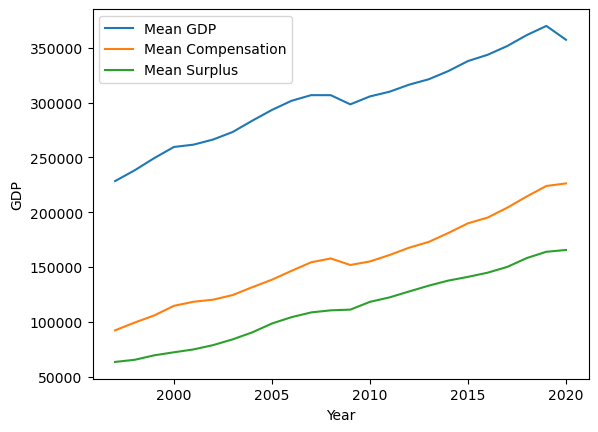

In [426]:
# 4(b)

mean_values = melted_df.groupby('Year').agg({
    'GDP': 'mean',
    'Compensation': 'mean',
    'Surplus': 'mean'
}).reset_index()


sns.lineplot(data = mean_values, x = 'Year', y = 'GDP', label = 'Mean GDP', ci=90)
sns.lineplot(data = mean_values, x = 'Year', y = 'Compensation', label = 'Mean Compensation', ci=90)
sns.lineplot(data = mean_values, x = 'Year', y = 'Surplus', label = 'Mean Surplus', ci=90)

In [425]:
# 4(b; i, ii, and iii)

print('The Mean GDP in the United States usually Rises every year, expect during a collapse like 2008 or during Covid.')
print(' ')
print('The Mean Compensation also usually Rises every year, expect during collapses like 2008 or Covid.')
print(' ')
print('The Mean Surplus usually also goes up every year, has a small decrease during collapses like 2008 or covid.')

The Mean GDP in the United States usually Rises every year, expect during a collapse like 2008 or during Covid.
 
The Mean Compensation also usually Rises every year, expect during collapses like 2008 or Covid.
 
The Mean Surplus usually also goes up every year, has a small decrease during collapses like 2008 or covid.


In [428]:
# 4(c)

melted_df["Year"] = melted_df["Year"].astype(int)

gdp_2019_2020 = melted_df[melted_df["Year"].isin([2019, 2020])]

gdp_year_state = gdp_2019_2020.groupby(["Year", "State"]).mean().reset_index()

decrease_in_gdp = gdp_by_year_state[gdp_by_year_state["Year"] == 2020]

gdp_2019 = gdp_by_year_state[gdp_by_year_state['Year'] == 2019]
gdp_2020 = gdp_by_year_state[gdp_by_year_state['Year'] == 2020]

merged_gdp = pd.merge(gdp_2019, gdp_2020, on = 'State', suffixes = ('_2019', '_2020'))

decreased_states = merged_gdp[merged_gdp['GDP_2020'] < merged_gdp['GDP_2019']]['State']

print('States with decreased GDP in 2020 compared to 2019: \n\n', decreased_states.tolist())

print(' ')

increased_states = merged_gdp[merged_gdp['GDP_2020'] > merged_gdp['GDP_2019']]['State'].unique()

print('States with Increased GDP in 2020 Compared to 2019: \n\n', increased_states.tolist())

States with decreased GDP in 2020 compared to 2019: 

 ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
 
States with Increased GDP in 2020 Compared to 2019: 

 ['South Dakota', 'Utah']


In [429]:
#4(e) //Only way I could make this work is doing e first, apologies.

state_region_mapping = pd.read_csv("State_region_mapping.csv")

merged_df = pd.merge(melted_df, state_region_mapping, on="State", how="inner")

df_2020 = merged_df[merged_df['Year'] == 2020]

df_2020["GDP"] = pd.to_numeric(df_2020["GDP"], errors="coerce")

total_gdp_by_region = df_2020.groupby("Region")["GDP"].sum().reset_index()

df_2020["State"] = df_2020["State"].astype(str) 
df_2020.dropna(subset=["GDP"], inplace=True)

max_gdp_by_region = df_2020.groupby("Region").apply(
    lambda x: x.loc[x["GDP"].idxmax()]
).reset_index(drop=True)

max_gdp_by_region["Percentage Contribution"] = (
    max_gdp_by_region["GDP"] / total_gdp_by_region["GDP"] * 100
)

print("Top States Contributing the Most to the Total GDP of their Region in 2020:")

max_gdp_by_region

Top States Contributing the Most to the Total GDP of their Region in 2020:


C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\4087736210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["GDP"] = pd.to_numeric(df_2020["GDP"], errors="coerce")
C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\4087736210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["State"] = df_2020["State"].astype(str)
C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\4087736210.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,State,Year,GDP,Surplus,ChainTypeIndex,Compensation,Region,Percentage Contribution
0,Illinois,2020,737643.6,339030.6,101.548,482911.0,Midwest,19.750832
1,New York,2020,1420141.0,752989.8,106.920,900256.6,Northeast,39.574346
2,Hawaii,2020,70625.2,31098.0,98.220,47292.1,Pacific,58.471249
3,Texas,2020,1734321.1,724665.2,122.034,955947.0,South,28.761151
4,California,2020,2663665.9,1245131.6,126.055,1658813.1,West,56.003620


The Two Regions that seems to have the Least GDP Growth is the West & Midwest


C:\Users\Brian Bronner\AppData\Local\Temp\ipykernel_3104\1415537059.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=by_region, x='Year', y='GDP', hue='Region', ci=None)


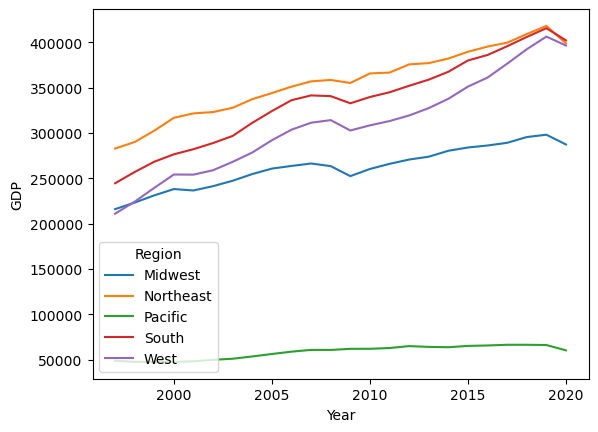

In [430]:
#4(d)
merged_df = merged_df.drop(columns=["State"])

by_region = merged_df.groupby(["Year", "Region"]).mean().reset_index()

sns.lineplot(data=by_region, x='Year', y='GDP', hue='Region', ci=None)

print('The Two Regions that seems to have the Least GDP Growth is the West & Midwest')

# Question 5

In [431]:
house_features1 = pd.read_csv('house_features1.csv')

house_features2 = pd.read_csv('house_features2.csv')

house_prices = pd.read_csv('house_prices.csv')

house_features1

,House_Id,variable,value
0,220,Neighborhood,Blmngtn
1,230,Neighborhood,Blmngtn
2,386,Neighborhood,Blmngtn
3,444,Neighborhood,Blmngtn
4,466,Neighborhood,Blmngtn
...,...,...,...
3015,1328,GrLivArea,816
3016,1408,GrLivArea,833
3017,1435,GrLivArea,1126
3018,1447,GrLivArea,1188


In [432]:
#5(a)

combined_features = pd.concat([house_features1, house_features2], ignore_index = True)

observations = combined_features.shape[0]

print('Number of Observations in Combined Dataset: ', observations)

Number of Observations in Combined Dataset:  7300


In [433]:
#5(b)

reshaped_df = combined_features.pivot(index = "House_Id", columns = "variable", values = "value")

reshaped_df.reset_index(inplace = True)

num_columns = reshaped_df.shape[1] - 1

print('Number of Columns in Reshaped Database (excluding House_Id)', num_columns)

Number of Columns in Reshaped Database (excluding House_Id) 5


In [434]:
#5(c)

reshaped_df.reset_index(inplace = True, drop = True)

combined = pd.merge(reshaped_df, house_prices, on = 'House_Id', how = 'inner')

num_observations = combined.shape[0]

print("Number of Observations in the Combined Dataset:", num_observations)
combined

Number of Observations in the Combined Dataset: 1460


,House_Id,BldgType,GrLivArea,HouseStyle,Neighborhood,OverallQual,SalePrice
0,1,1Fam,1710,2Story,CollgCr,7,208500.0
1,2,1Fam,1262,1Story,Veenker,6,181500.0
2,3,1Fam,1786,2Story,CollgCr,7,223500.0
3,4,1Fam,1717,2Story,Crawfor,7,NaN
4,5,1Fam,2198,2Story,NoRidge,8,250000.0
...,...,...,...,...,...,...,...
1455,1456,1Fam,1647,2Story,Gilbert,6,175000.0
1456,1457,1Fam,2073,1Story,NWAmes,6,210000.0
1457,1458,1Fam,2340,2Story,Crawfor,7,266500.0
1458,1459,1Fam,1078,1Story,NAmes,5,142125.0


In [435]:
#5(d)

variance = combined.groupby('Neighborhood')['SalePrice'].var().reset_index()

max_variance = variance.loc[variance['SalePrice'].idxmax()]

print("Neighborhoods with the Highest Variance in Sale Price:")
max_variance

Neighborhoods with the Highest Variance in Sale Price:


Neighborhood               NoRidge
SalePrice       13484008053.968254
Name: 15, dtype: object

In [439]:
#5(e)

filtered = combined.groupby("Neighborhood").filter(lambda x: len(x) > 10)

combined["GrLivArea"] = pd.to_numeric(combined["GrLivArea"], errors="coerce")
combined["SalePrice"] = pd.to_numeric(combined["SalePrice"], errors="coerce")

combined = combined.dropna(subset=["GrLivArea", "SalePrice"])

correlation = filtered.groupby("Neighborhood").apply(
    lambda group: group["GrLivArea"].corr(group["SalePrice"])
)

highest_correlation = correlation.sort_values(ascending = False).head(1)

print("Neighborhood with the Highest Correlation Between GrLivArea and SalePrice as a Percentage:")

highest_correlation*100

Neighborhood with the Highest Correlation Between GrLivArea and SalePrice as a Percentage:


Neighborhood
NoRidge    88.503335
dtype: float64

In [440]:
#5(f)

cleaned = combined.dropna(subset = ['OverallQual', 'SalePrice'])

filtered_scores = cleaned[cleaned["OverallQual"].isin([2, 5, 7])]

median_sales = filtered_scores.groupby('OverallQual')['SalePrice'].median().reset_index()

median_pricedf = pd.DataFrame({
    'OverallQual': median_sales['OverallQual'],
    'Median Sale Price': median_sales['SalePrice']
})

print("Median Sale Prices for OverallQual Scores 2, 5, 7:")

median_pricedf

Median Sale Prices for OverallQual Scores 2, 5, 7:


,OverallQual,Median Sale Price


# Question 6

In [441]:
car_feature_test = pd.read_csv('Car_features_test.csv')

car_feature_test

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0
1,14919,bmw,6 Series,2014,Semi-Auto,62695,Diesel,165,51.2769,3.0
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0
4,12641,bmw,6 Series,2015,Automatic,25757,Diesel,160,49.6192,3.0
...,...,...,...,...,...,...,...,...,...,...
2667,17161,vauxhall,Zafira Tourer,2017,Manual,22688,Petrol,150,41.5865,1.4
2668,17742,vauxhall,Zafira Tourer,2017,Manual,17527,Petrol,200,41.6969,1.4
2669,18775,vauxhall,Zafira Tourer,2017,Manual,29221,Petrol,145,41.3406,1.4
2670,13181,vauxhall,Zafira Tourer,2017,Automatic,27477,Petrol,200,40.7051,1.4


In [442]:
car_prices_train = pd.read_csv('Car_prices_train.csv')

car_prices_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [443]:
car_features_train = pd.read_csv('Car_features_train.csv')

car_features_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0
...,...,...,...,...,...,...,...,...,...,...
4955,17735,vauxhall,Zafira Tourer,2017,Automatic,34416,Petrol,200,41.0223,1.4
4956,14016,vauxhall,Zafira Tourer,2017,Automatic,21227,Petrol,200,40.8438,1.4
4957,18035,vauxhall,Zafira Tourer,2013,Manual,121349,Petrol,235,39.1574,1.8
4958,17248,vauxhall,Zafira Tourer,2016,Automatic,21491,Petrol,235,39.3921,1.4


In [444]:
car_prices_test = pd.read_csv('Car_prices_test.csv')

car_prices_test

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000
...,...,...
2667,19618,28990
2668,19620,17450
2669,19626,21995
2670,19630,18700


In [445]:
#6(a)

combined_df = pd.merge(car_features_train, car_prices_train, on = 'carID', how = 'inner')

num_rows = combined_df.shape[0]
num_columns = combined_df.shape[1]
num_cells = num_rows * num_columns

print("Total Number of Cells in the Combined Dataset:")
num_cells

Total Number of Cells in the Combined Dataset:


54560

In [446]:
#6(b)

combined_test = pd.merge(car_features_test, car_prices_test, on = 'carID', how = 'inner')

combined = pd.concat([combined_df, combined_test], ignore_index = True)

print("Total Number of Rows after Appending:")
combined.shape[0]

Total Number of Rows after Appending:


7632

In [447]:
#6(c)

avg_price = combined.groupby('brand')['price'].mean().reset_index()

cheapest = avg_price[avg_price['price'] == avg_price['price'].min()]

most_expensive = avg_price[avg_price['price'] == avg_price['price'].max()]

print("Brand with the Cheapest Cars on Average:")
cheapest

print('Brand with the Most Expensive Cars on Average')
most_expensive

Brand with the Cheapest Cars on Average:
Brand with the Most Expensive Cars on Average


,brand,price
0,audi,43055.277247


In [448]:
#6(d)

model_range = combined.groupby('model')['price'].agg(
    min_price = 'min',
    max_price = 'max'
).reset_index()

model_range["price_range"] = model_range["max_price"] - model_range["min_price"]

highest_range = model_range[model_range["price_range"] == model_range["price_range"].max()]

print("Model with the Highest Price Range:")
highest_range

Model with the Highest Price Range:


,model,min_price,max_price,price_range
63,S Class,1695,124999,123304


In [449]:
#6(d)

engine_Size_count = combined['engineSize'].value_counts()

most_common = engine_Size_count.idxmax()

print("The Most Common Engine Size Across All Cars:")
most_common

The Most Common Engine Size Across All Cars:


2.0

<Axes: xlabel='mileage', ylabel='brand'>

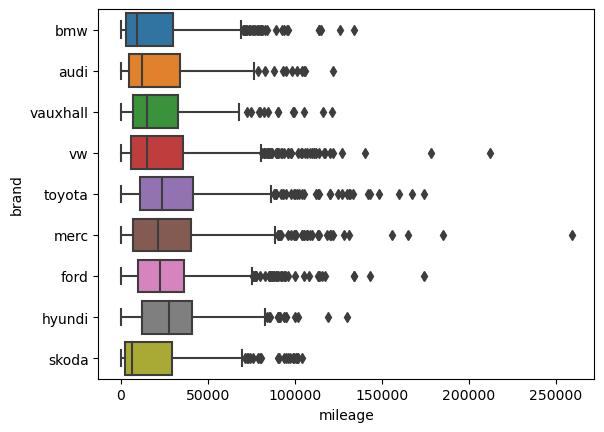

In [450]:
#6(e)
combined[combined['year'] > 2015]

sns.boxplot(combined, x = 'mileage', y = 'brand', )